In [36]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '8'
environ['maxsize']= '100000'
environ['batch_size']= '2048'
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MSE'

%run utils.ipynb

In [37]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{str.lower(loss_func)}_nlayers_{len(layers_sizes)}") 

In [16]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


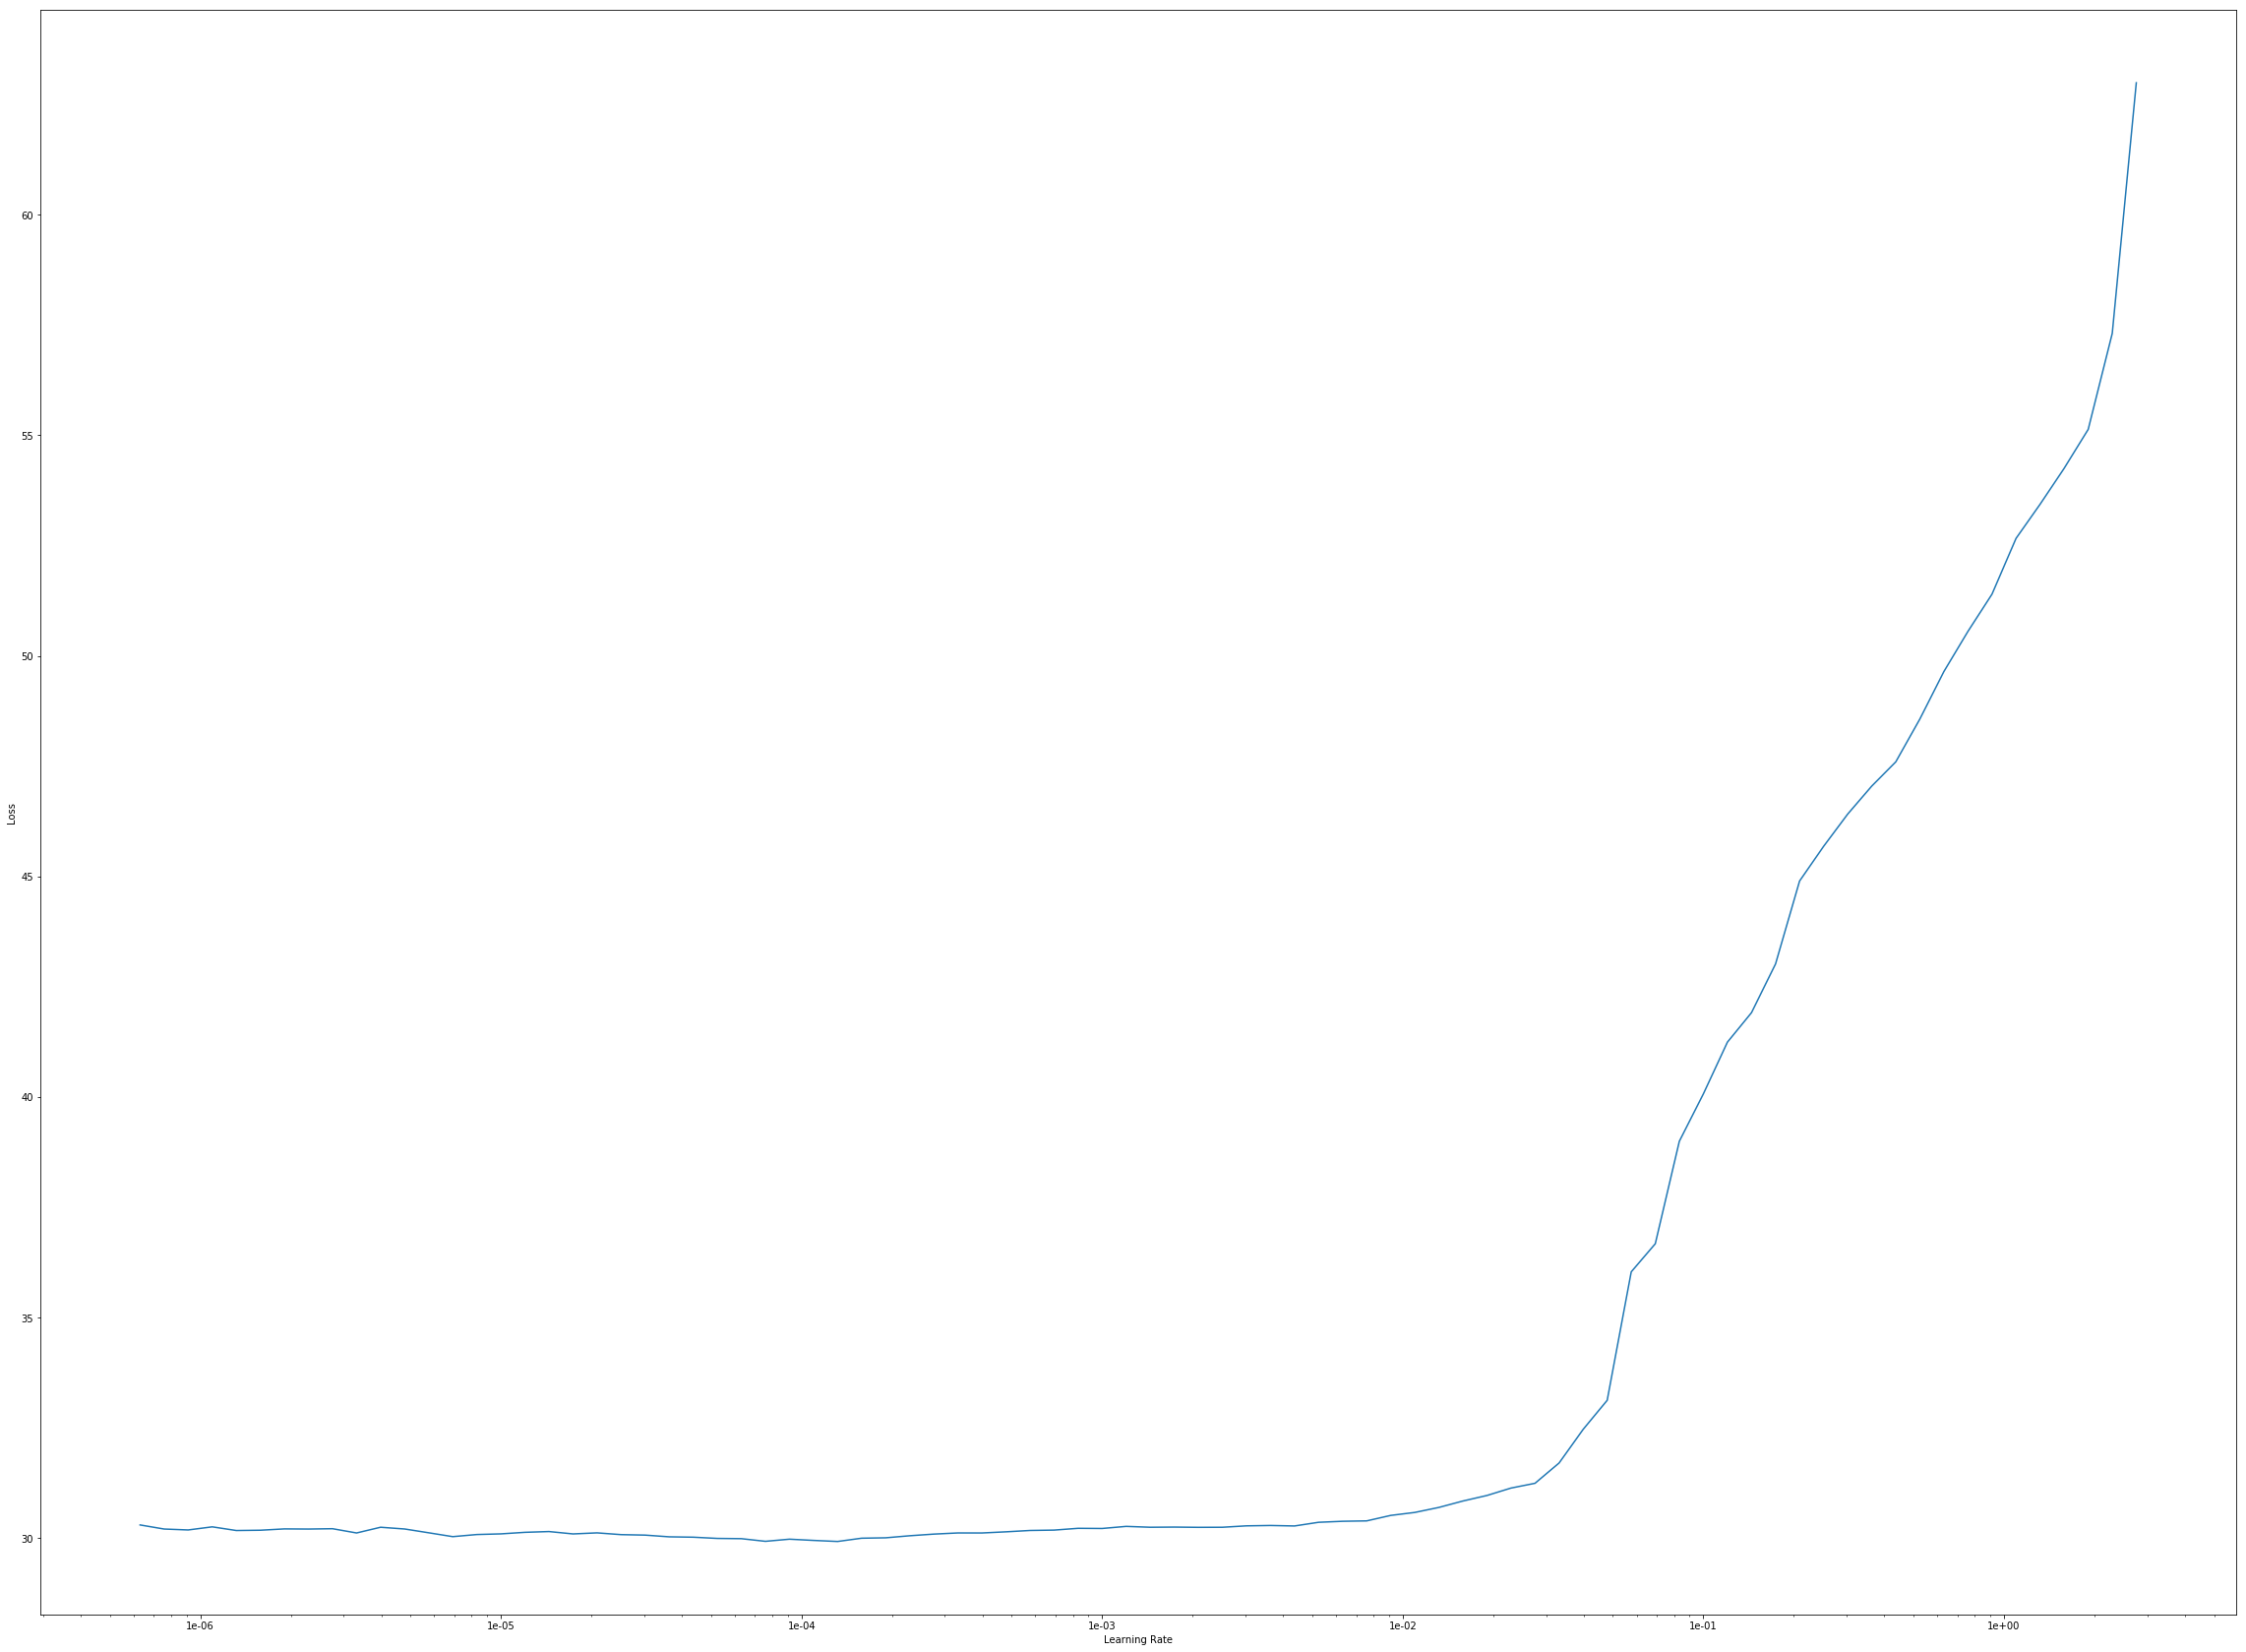

In [17]:
l.recorder.plot()

In [52]:
lr = 1e-5

In [53]:
l.fit_one_cycle(n_epochs, lr)

epoch,train_loss,valid_loss
1,29.783981,29.495241
2,29.795937,30.234453
3,29.775681,29.745062
4,29.742237,29.231718
5,29.746874,29.370893
6,29.843475,29.533276
7,29.813078,29.830612
8,29.784506,29.558928
9,29.770081,29.255899
10,29.706633,29.193718


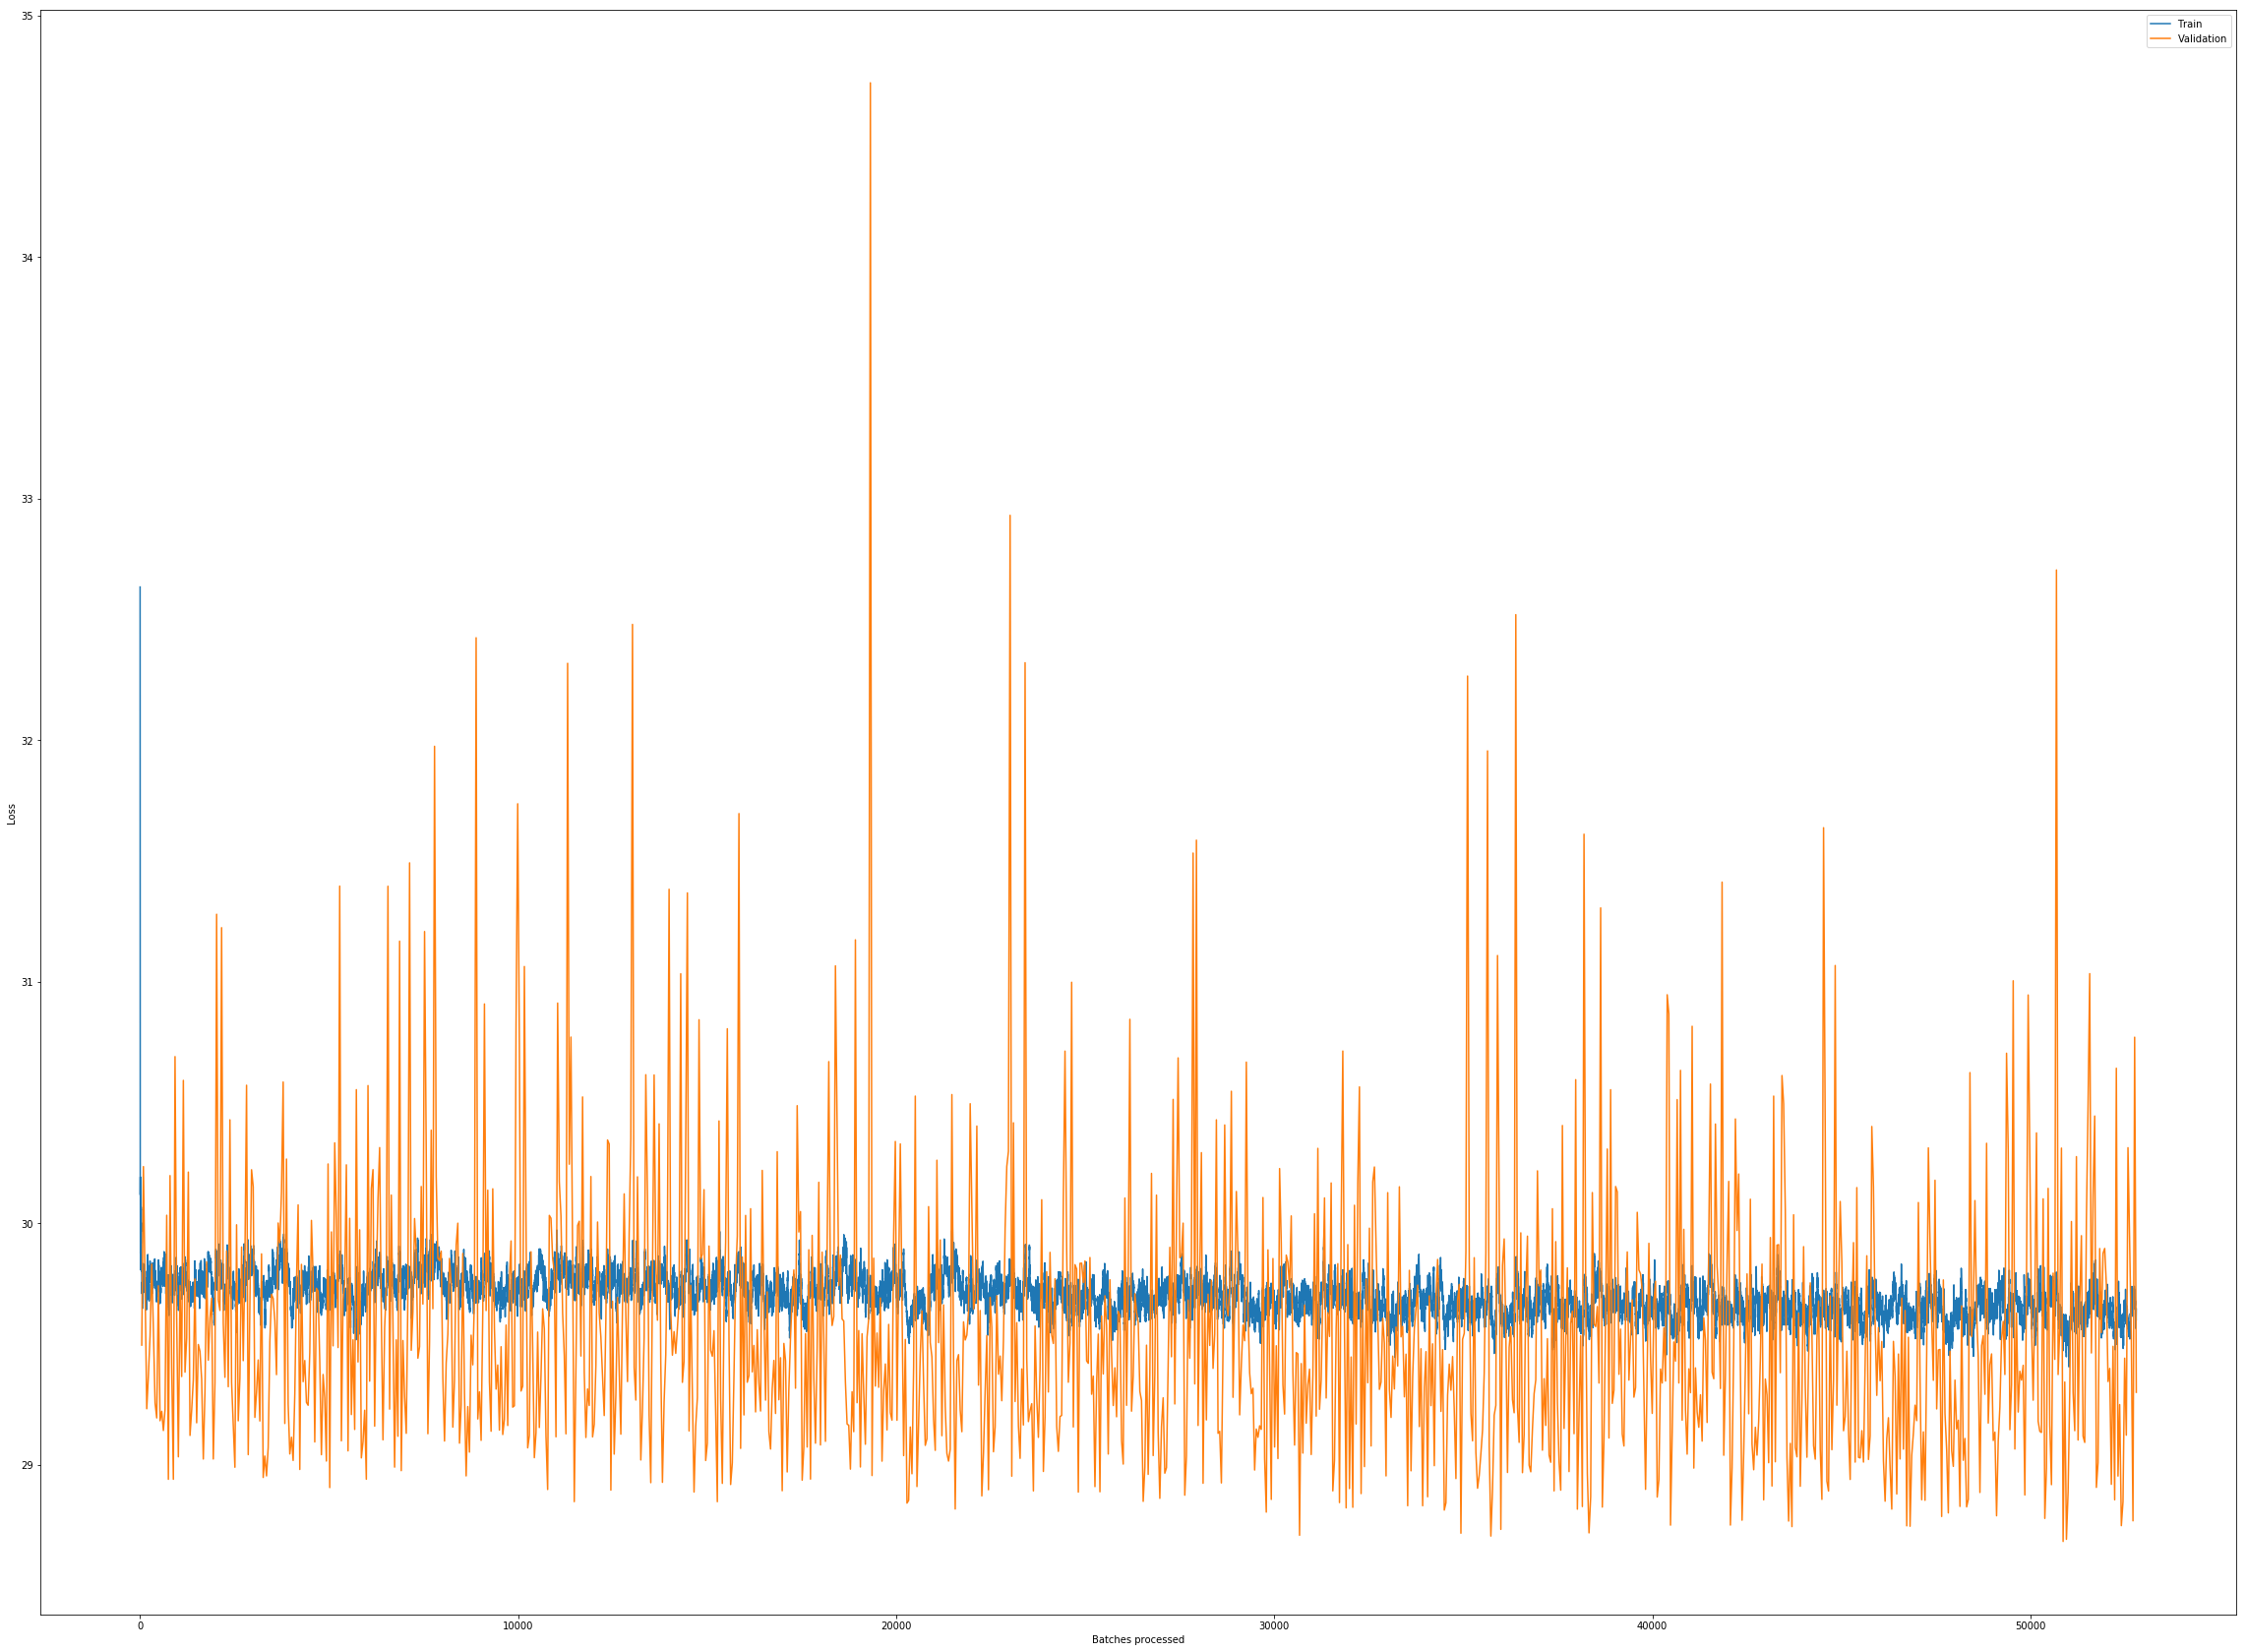

In [54]:
l.recorder.plot_losses()

In [18]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_mape_nlayers_{len(layers_sizes)}")

In [38]:
val_df = pd.DataFrame()
train_df = pd.DataFrame()

preds, targets = l.get_preds(fai.basic_data.DatasetType.Valid)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

val_df['prediction'] = preds
val_df['target'] = targets
val_df['abs_diff'] = np.abs(preds - targets)
val_df['APE'] = np.abs(val_df.target - val_df.prediction)/val_df.target * 100

preds, targets = l.get_preds(fai.basic_data.DatasetType.Train)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

train_df['prediction'] = preds
train_df['target'] = targets
train_df['abs_diff'] = np.abs(preds - targets)
train_df['APE'] = np.abs(train_df.target - train_df.prediction)/train_df.target * 100

In [39]:
val_df.describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.488608,2.027994,0.783037,42.370827
std,1.397441,1.919018,0.951529,35.802860
min,-0.144552,0.030862,0.000029,0.006558
25%,0.457009,0.652639,0.151212,17.945035
50%,0.990529,1.392690,0.439346,36.675875
75%,2.103736,2.590816,1.042974,60.053606
max,8.528646,13.272740,8.072141,684.418823


/home/mohammed/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


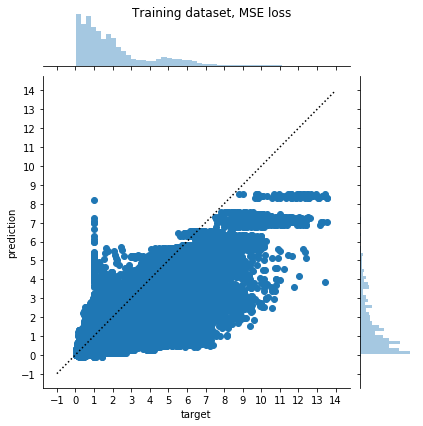

In [40]:
joint_plot(train_df, f"Training dataset, {loss_func} loss")

In [41]:
!ls models

Adam_batch_norm_False.pth
speedup_Adam_batch_norm_True_mape_nlayers_5.pth
speedup_Adam_batch_norm_True_mape.pth
speedup_Adam_batch_norm_True_mse_nlayers_5.pth
speedup_Adam_batch_norm_True_mse.pth
speedup_Adam_batch_norm_True.pth
tmp.pth
